In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.decomposition import FactorAnalysis
from sklearn.ensemble import RandomForestRegressor
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import numpy as np

In [3]:
main_path = '../data/pilot'
input_path = f'{main_path}/input'
buildings_path = f'{input_path}/buildings'
roads_path = f'{input_path}/roads'
intersections_path = f'{input_path}/intersections'
urban_extents_path = f'{input_path}/urban_extents'
output_path = f'{main_path}/output'
plots_path = '../plots/pilot'

In [4]:
final_geo_df = pd.read_excel(f'{output_path}/excel/pilot_test_results.xlsx')

In [5]:
all_metrics_columns = ['metric_1','metric_2','metric_3','metric_4','metric_5','metric_6','metric_7','metric_8','metric_9','metric_10','metric_11','metric_12','metric_13']
all_original_metrics_columns = ['metric_1','metric_2_original','metric_3_original','metric_4','metric_5_original','metric_6_original','metric_7_original','metric_8','metric_9','metric_10_original','metric_11_original','metric_12_original','metric_13_original']

original_mask = [col for col in final_geo_df.columns if '_original' in col]

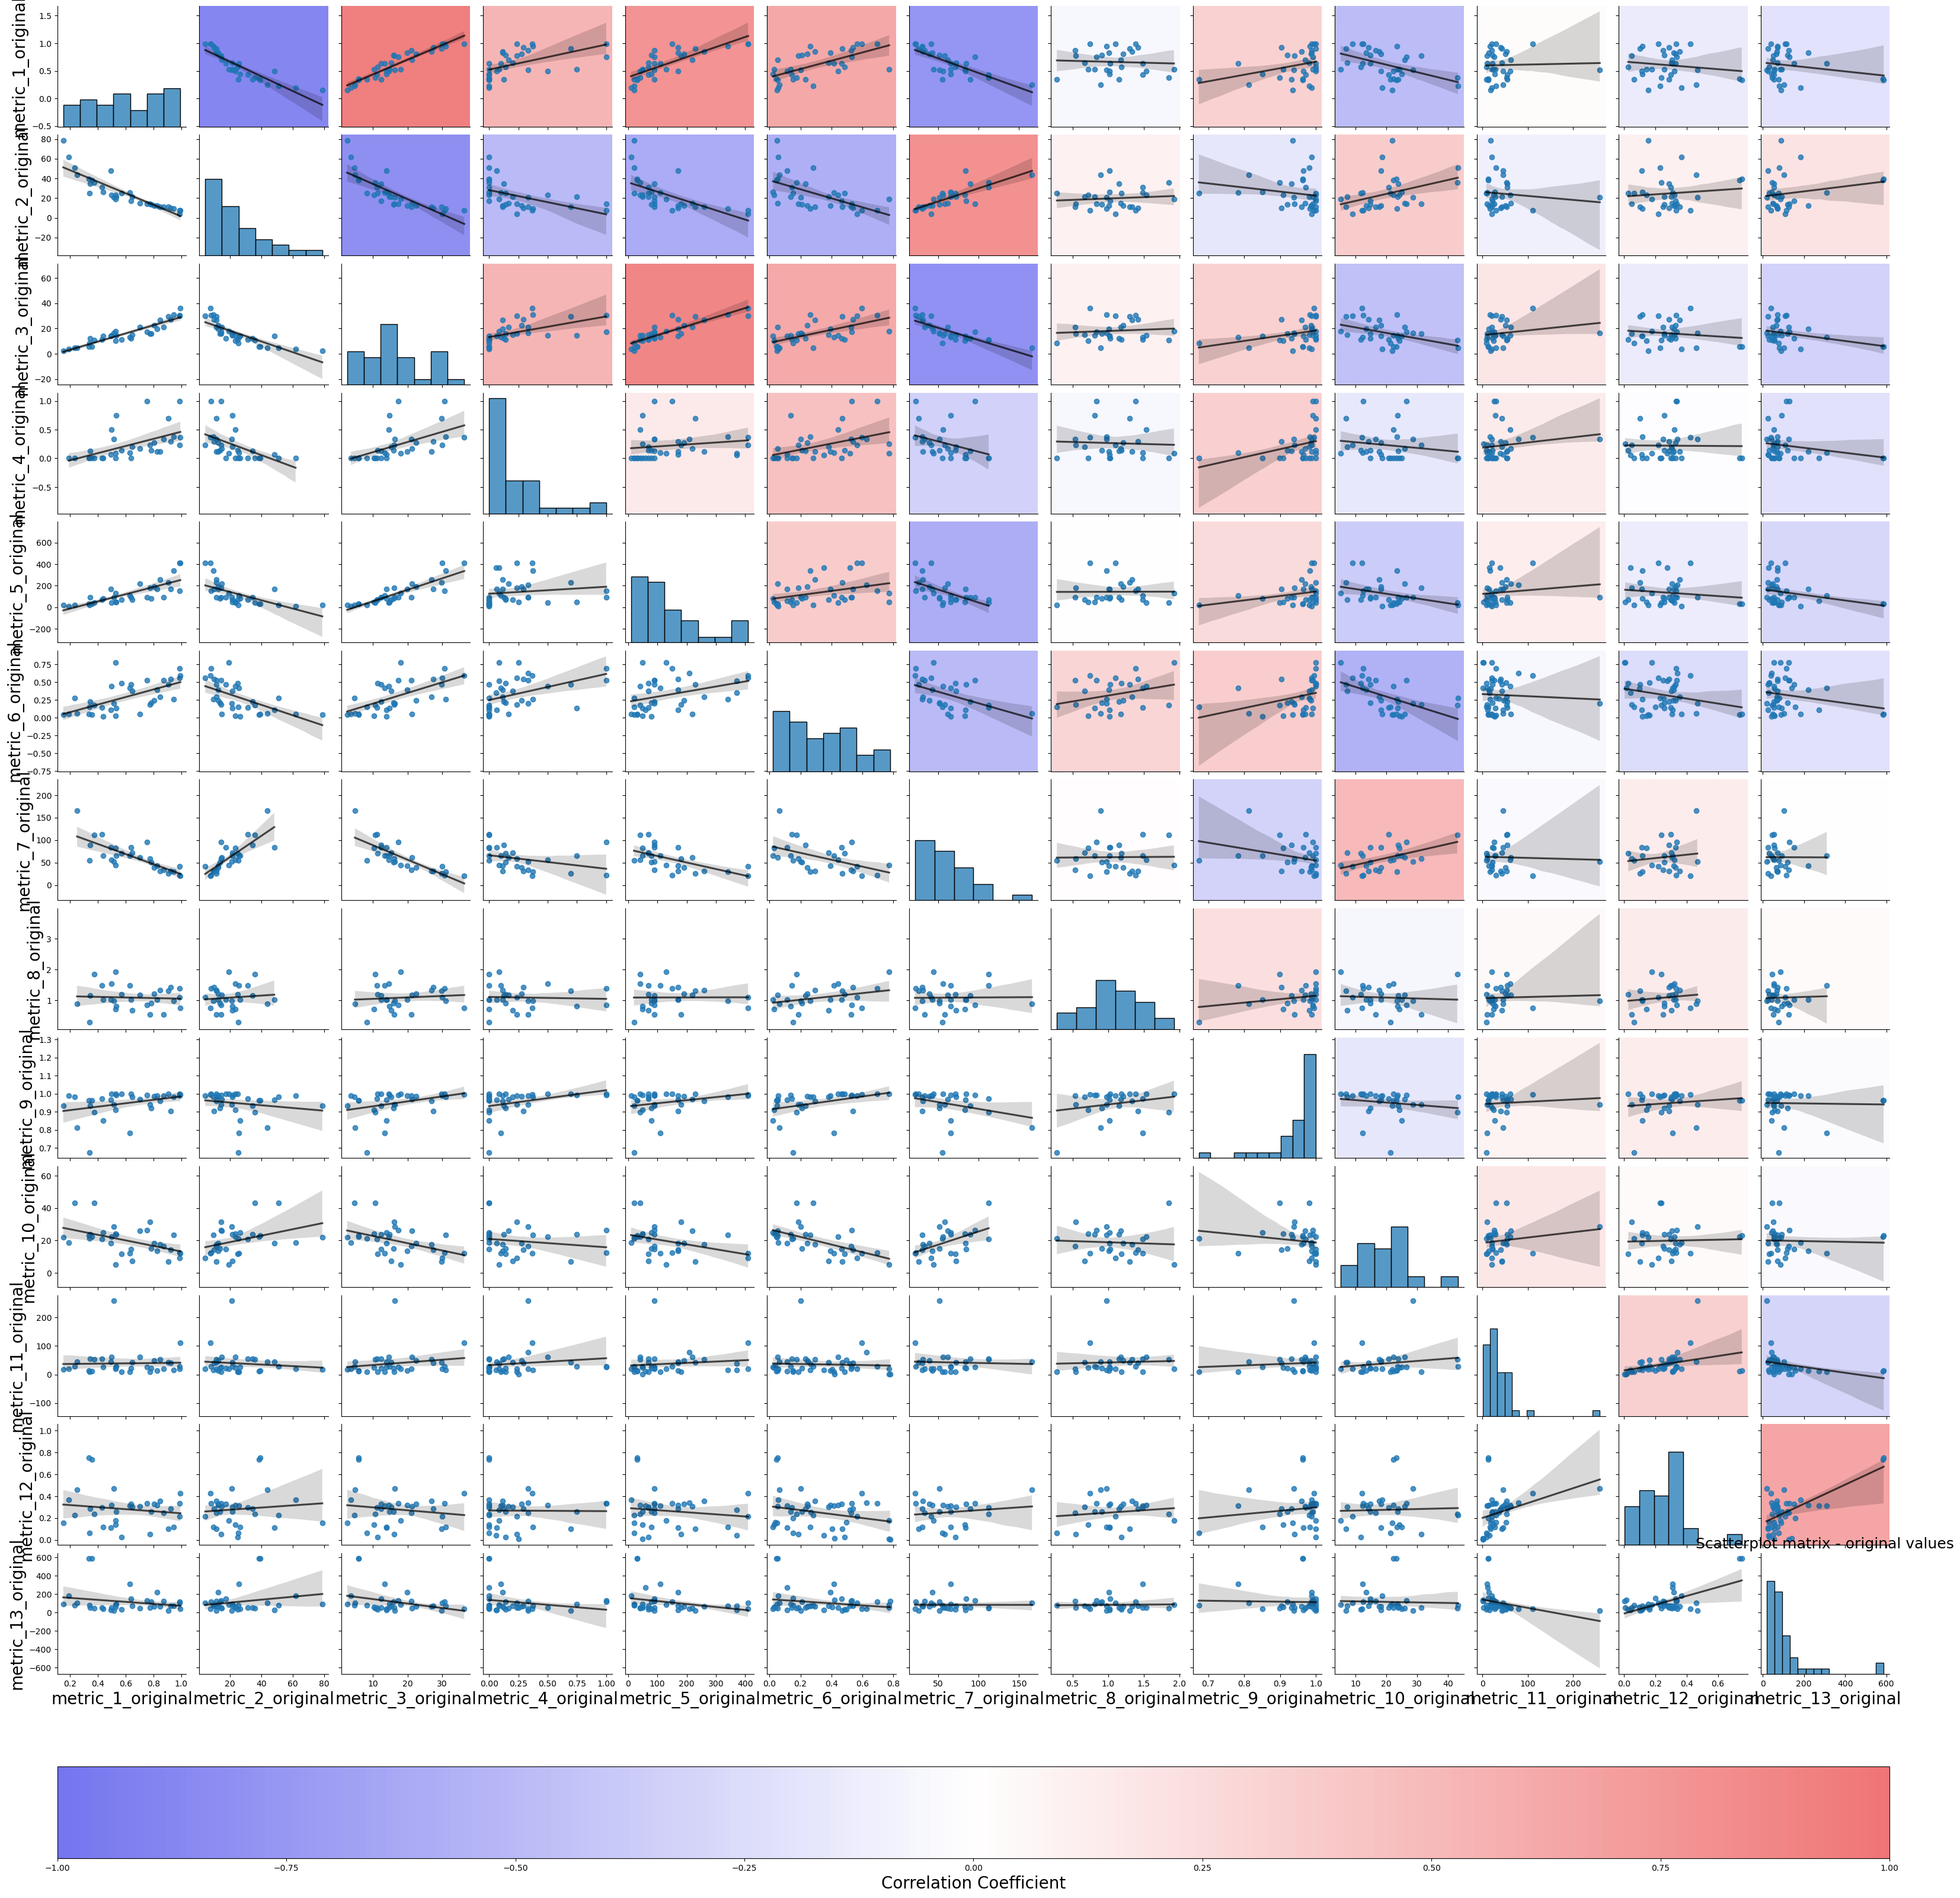

In [6]:
# Assuming final_geo_df, original_mask, and plots_path are defined
df_subset = final_geo_df[original_mask]

# Select only numeric columns
columns = df_subset.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix
corr = df_subset[columns].corr()

# Define a custom colormap with alpha transparency (RGBA)
#colors = [(0.9, 0.1, 0.1, 0.6), (1, 1, 1, 0.6), (0.1, 0.1, 0.9, 0.6)]  # Red -> White -> Blue
colors = [(0.1, 0.1, 0.9, 0.6), (1, 1, 1, 0.6), (0.9, 0.1, 0.1, 0.6)]  # Blue -> White -> Red
cmap = LinearSegmentedColormap.from_list("corr_cmap", colors)

# Function to map correlation to color
def corr_to_color(val):
    """Map correlation values to RGBA colors using the colormap."""
    return cmap((val + 1) / 2)  # Normalize correlation to [0, 1]

# Create the scatterplot matrix with customized colors
g = sns.pairplot(
    df_subset[columns],
    kind="reg",
    plot_kws={'line_kws': {'color': 'black', 'alpha': 0.7}},  # Regression lines with transparency
)

# Apply correlation-based background colors
for i, j in zip(*np.triu_indices_from(corr, 1)):
    ax = g.axes[i, j]
    color = corr_to_color(corr.iloc[i, j])
    ax.set_facecolor(color)

# Adjust font size for larger column names
for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=20)
    ax.set_ylabel(ax.get_ylabel(), fontsize=20)

# Add a colorbar to show the correlation color mapping
fig = g.fig
norm = plt.Normalize(vmin=-1, vmax=1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=g.axes, orientation='horizontal', fraction=0.05, pad=0.05)
cbar.set_label('Correlation Coefficient', fontsize=20)

plt.title('Scatterplot matrix - original values', fontsize=18)
# Save and display the plot
plt.savefig(f'{plots_path}/scatterplot_matrix_original_colored.png', dpi=300, bbox_inches='tight')
plt.show()


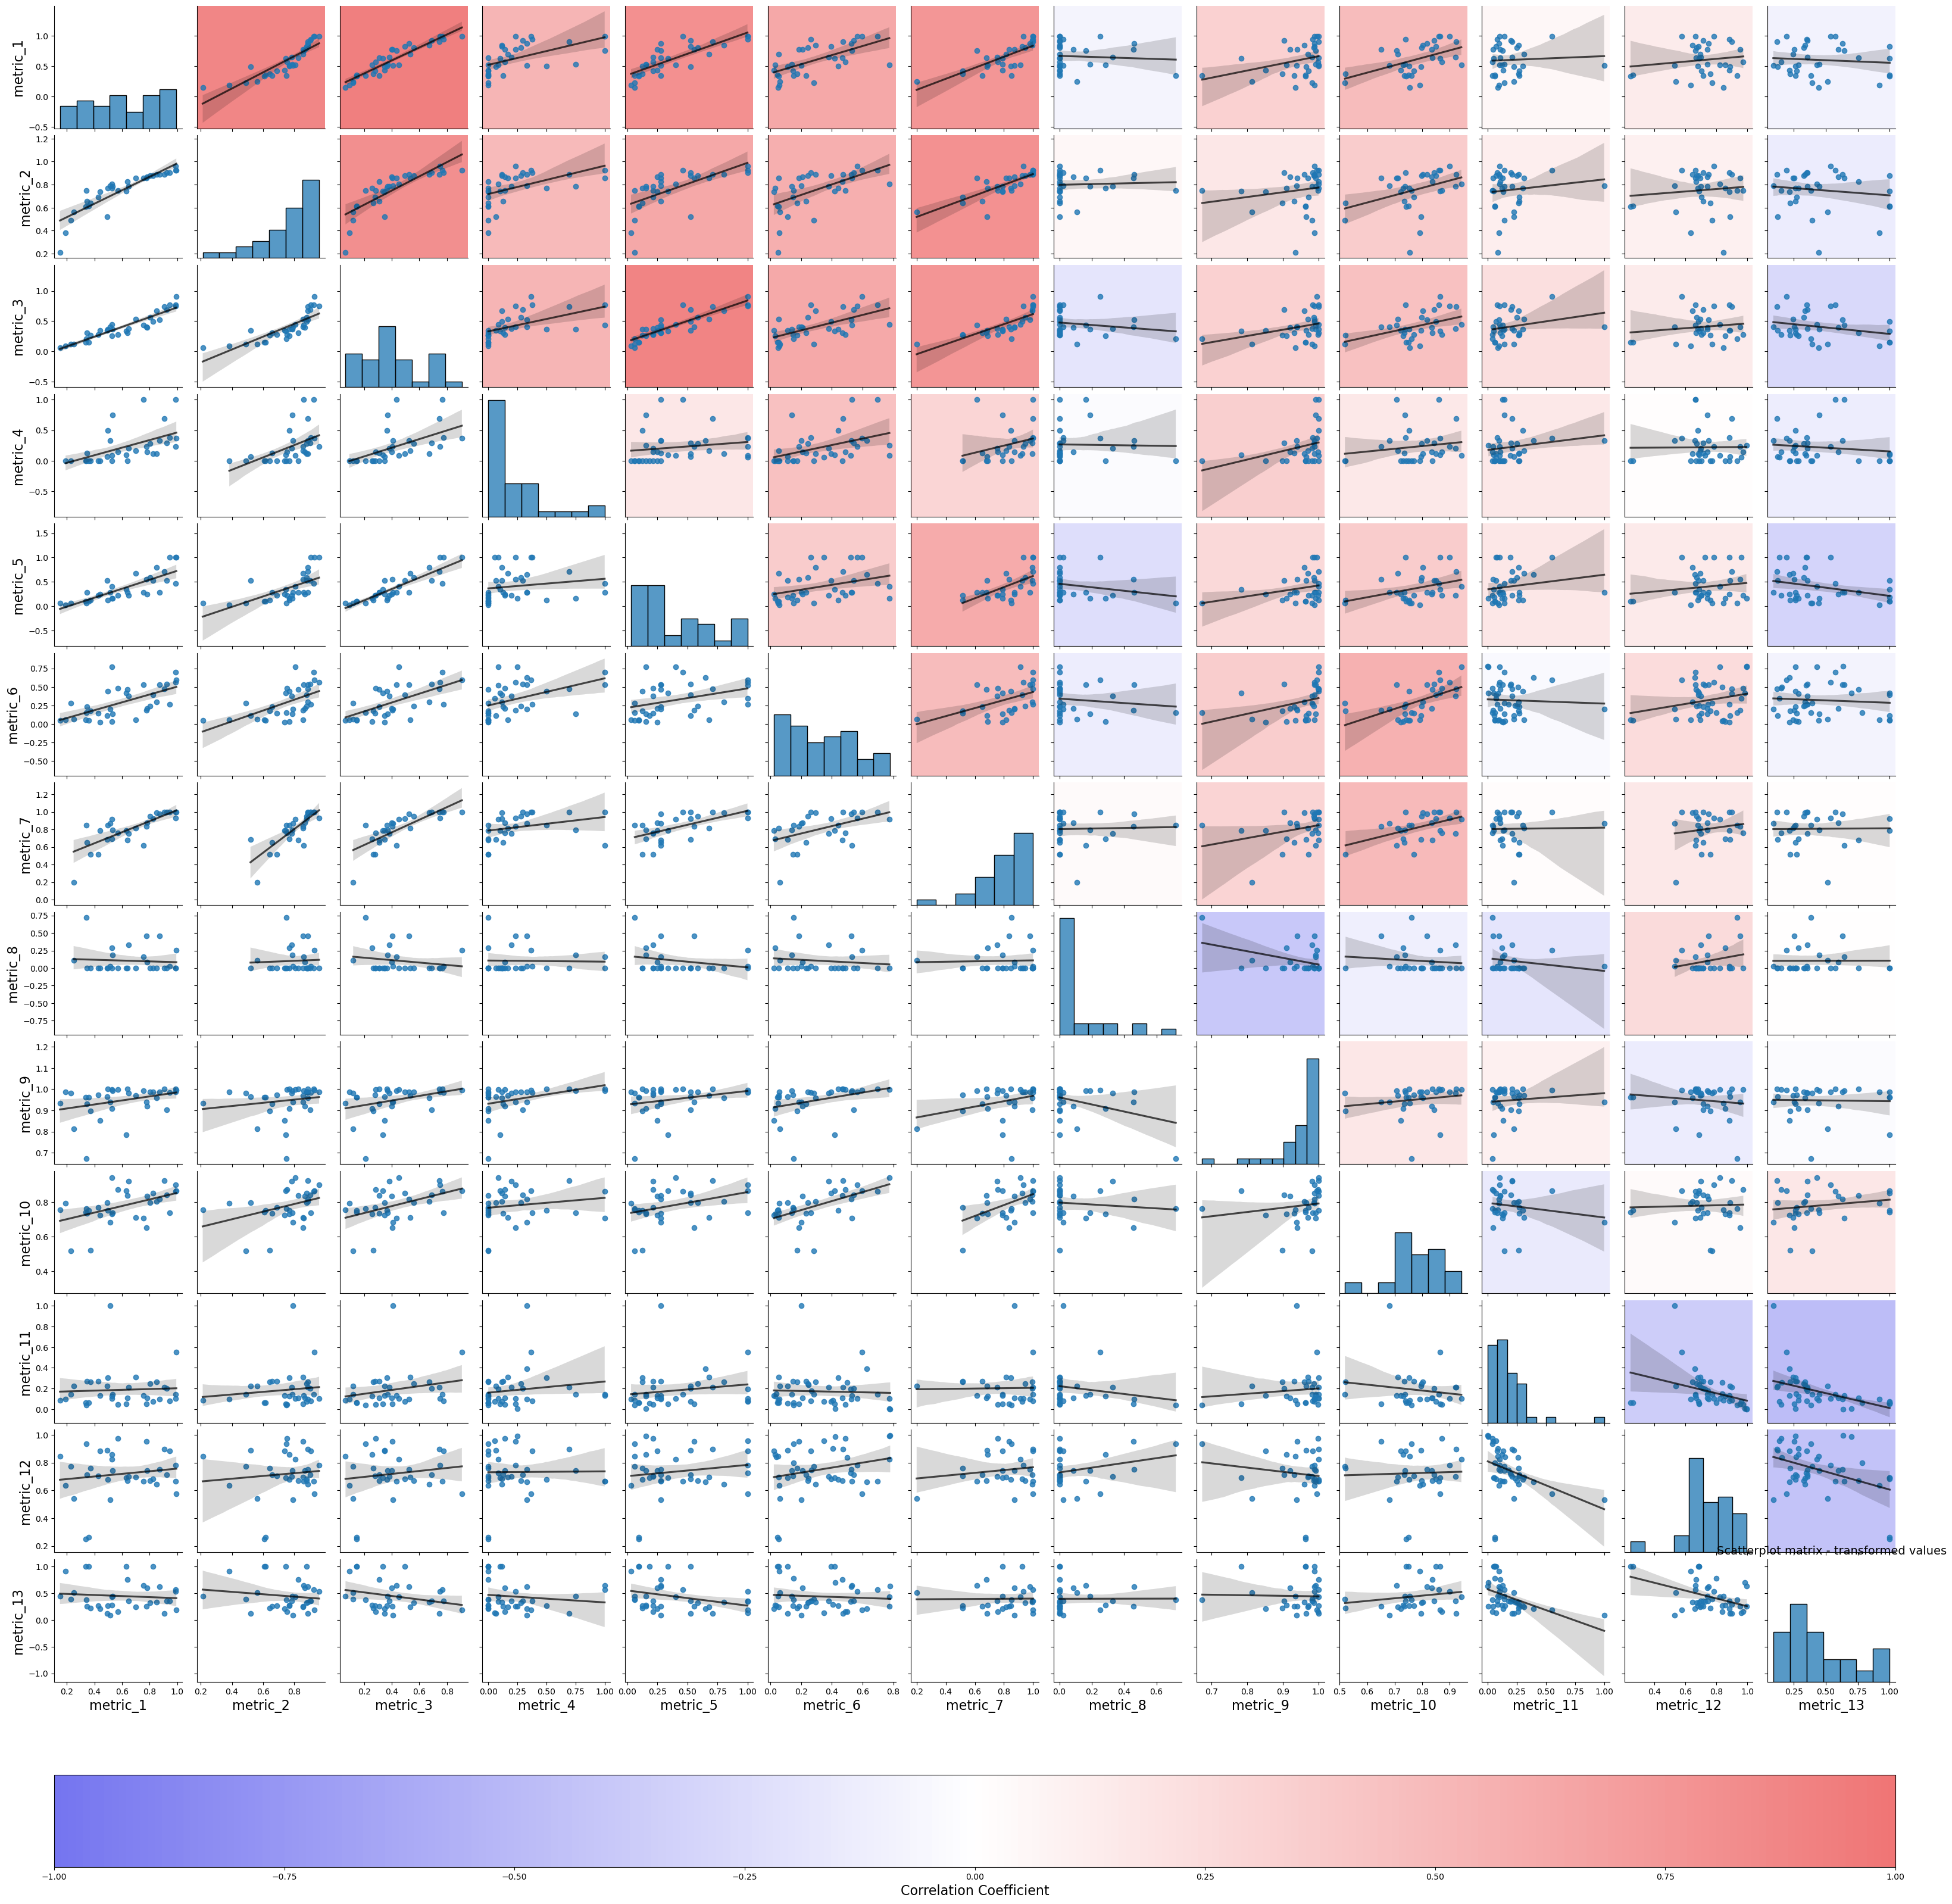

In [7]:
# Assuming final_geo_df, original_mask, and plots_path are defined
df_subset = final_geo_df[all_metrics_columns]

# Select only numeric columns
columns = df_subset.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix
corr = df_subset[columns].corr()

# Define a custom colormap with alpha transparency (RGBA)
colors = [(0.1, 0.1, 0.9, 0.6), (1, 1, 1, 0.6), (0.9, 0.1, 0.1, 0.6)]  # Blue -> White -> Red
cmap = LinearSegmentedColormap.from_list("corr_cmap", colors)

# Function to map correlation to color
def corr_to_color(val):
    """Map correlation values to RGBA colors using the colormap."""
    return cmap((val + 1) / 2)  # Normalize correlation to [0, 1]

# Create the scatterplot matrix with customized colors
g = sns.pairplot(
    df_subset[columns],
    kind="reg",
    plot_kws={'line_kws': {'color': 'black', 'alpha': 0.7}},  # Regression lines with transparency
)

# Apply correlation-based background colors
for i, j in zip(*np.triu_indices_from(corr, 1)):
    ax = g.axes[i, j]
    color = corr_to_color(corr.iloc[i, j])
    ax.set_facecolor(color)

# Adjust font size for larger column names
for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=16)
    ax.set_ylabel(ax.get_ylabel(), fontsize=16)

# Add a colorbar to show the correlation color mapping
fig = g.fig
norm = plt.Normalize(vmin=-1, vmax=1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=g.axes, orientation='horizontal', fraction=0.05, pad=0.05)
cbar.set_label('Correlation Coefficient', fontsize=16)

plt.title('Scatterplot matrix - transformed values', fontsize=14)

# Save and display the plot
plt.savefig(f'{plots_path}/scatterplot_matrix_transformed_colored.png', dpi=300, bbox_inches='tight')
plt.show()

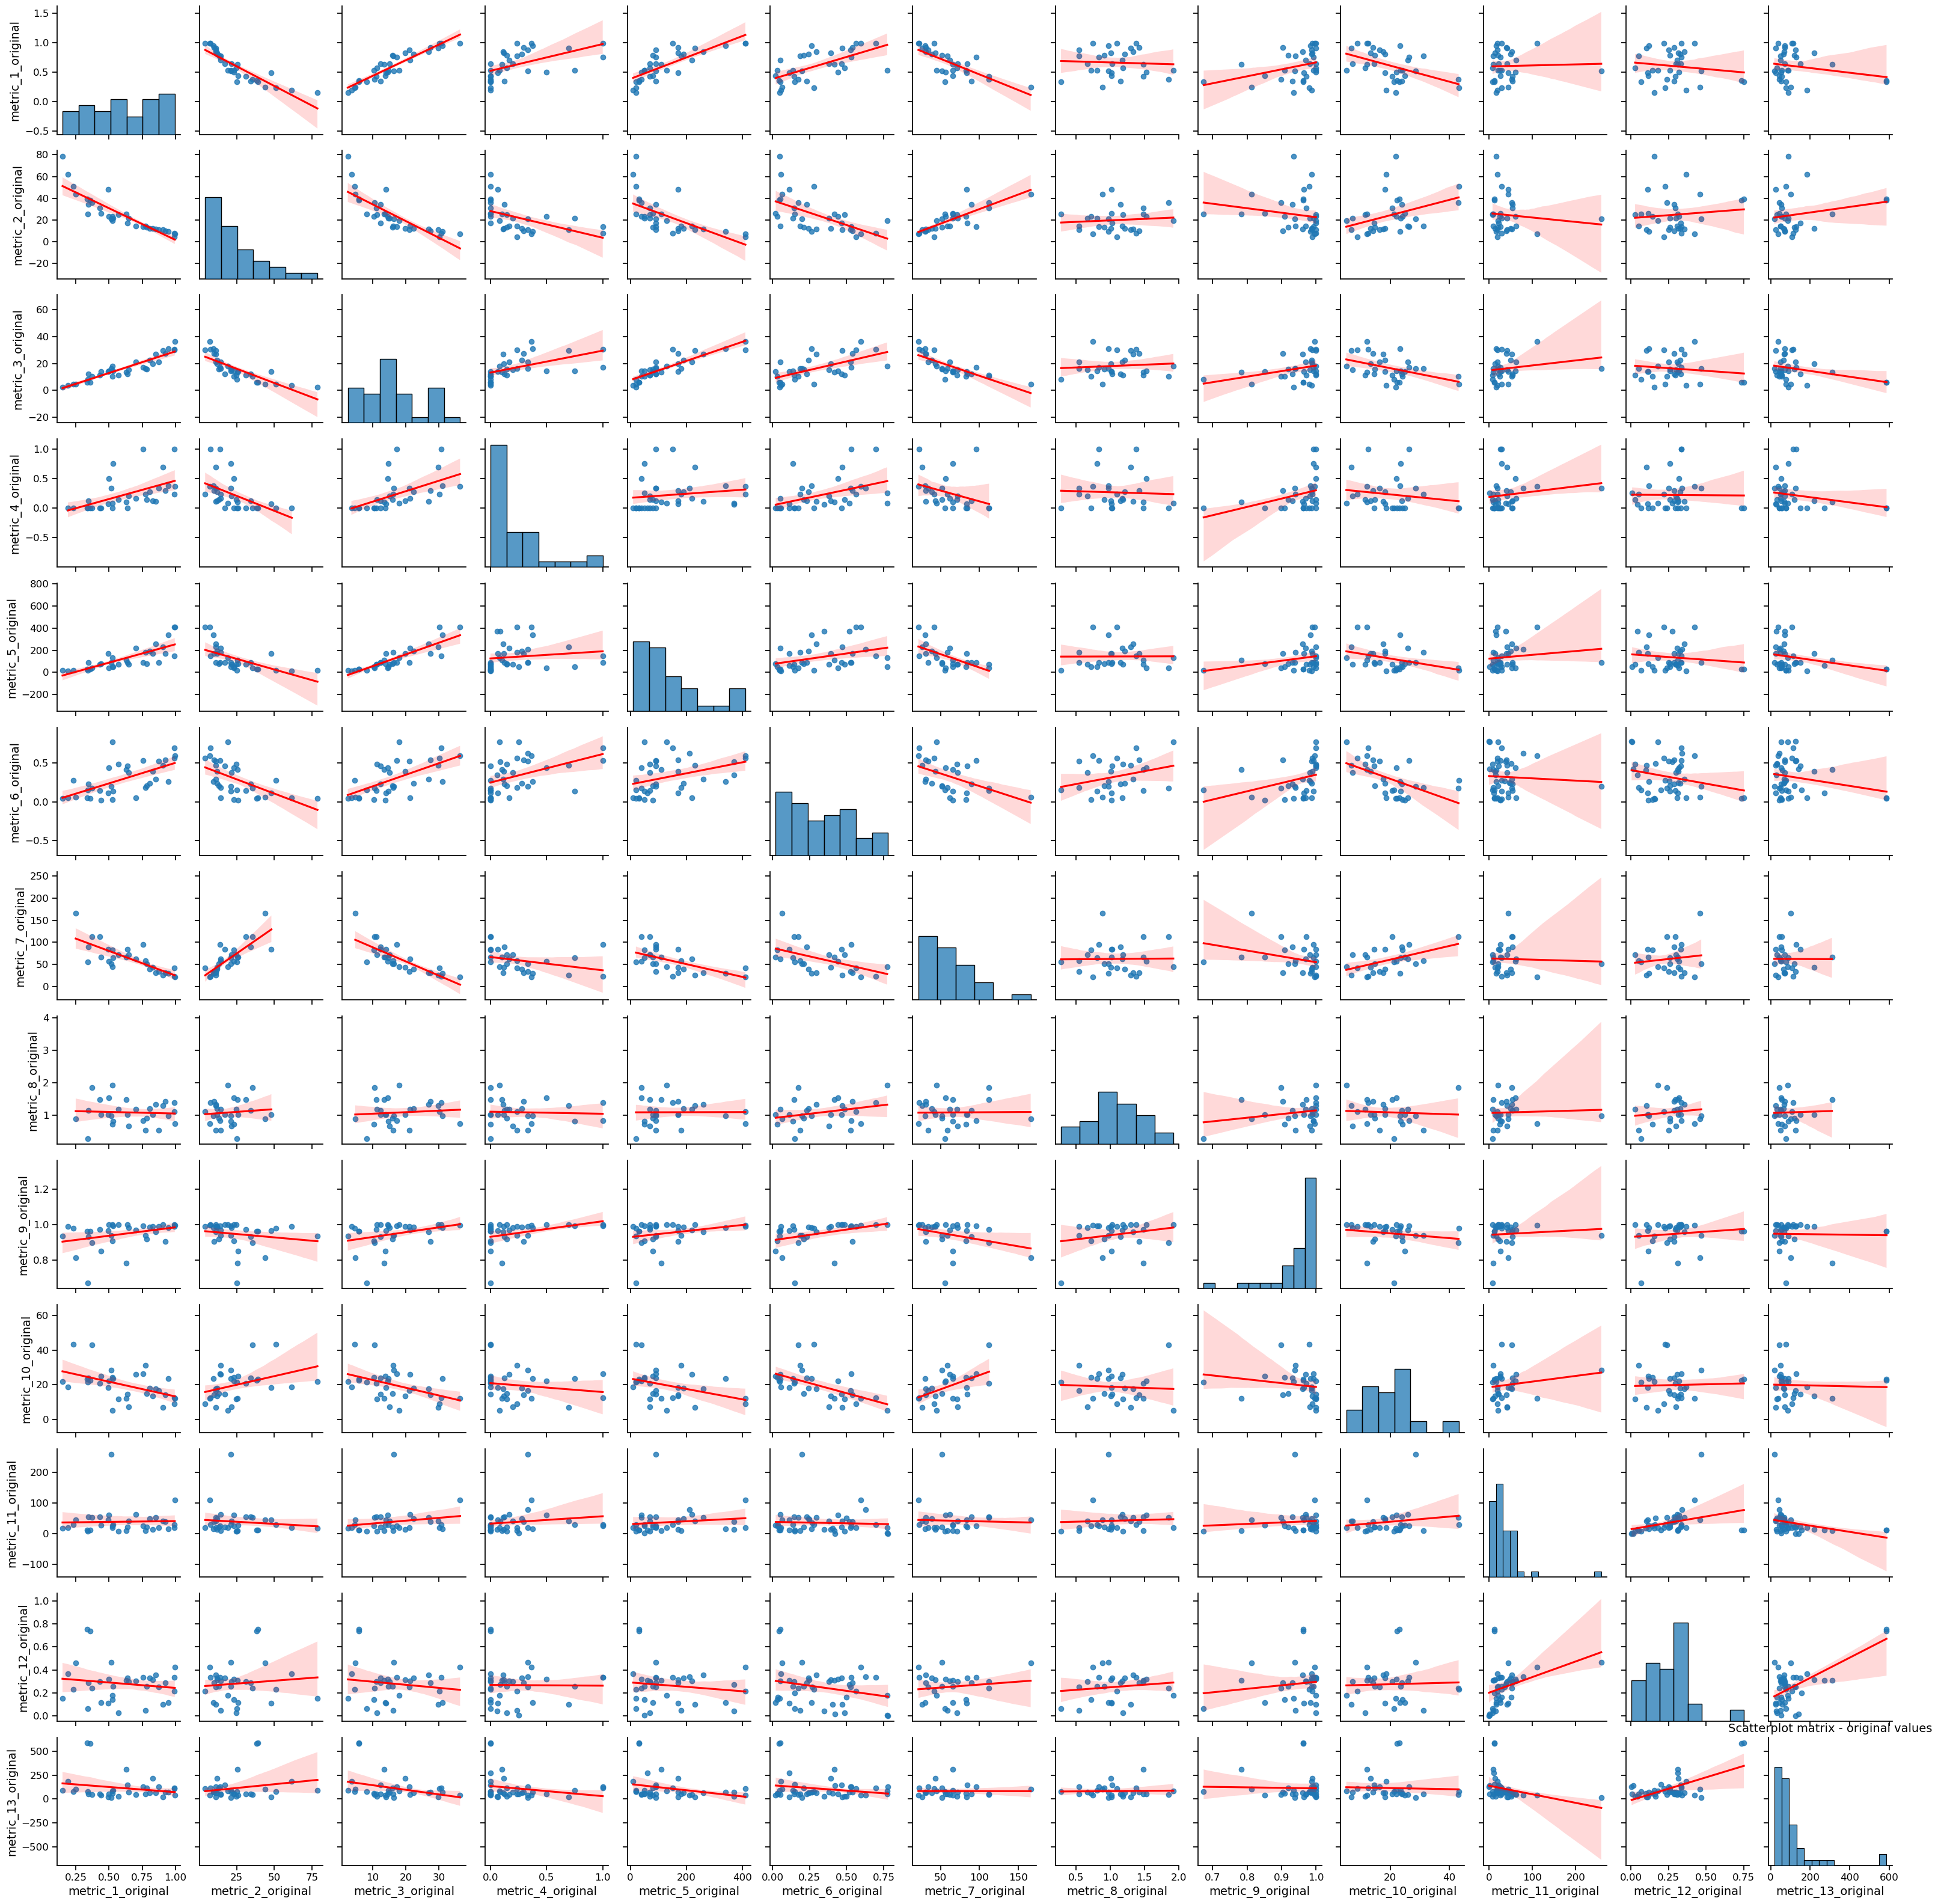

In [8]:
# Assuming final_geo_df, original_mask, and plots_path are defined
df_subset = final_geo_df[original_mask]

# Select relevant numerical columns for the scatterplot matrix
columns = df_subset.select_dtypes(include=['float64', 'int64']).columns

# Increase font size globally using Seaborn settings
sns.set_context("notebook", font_scale=1.5)  # Adjust `font_scale` as needed

# Create the scatterplot matrix with regression lines
g = sns.pairplot(df_subset[columns], kind="reg", plot_kws={'line_kws': {'color': 'red'}})

# Customize axis label fonts directly (optional, if you need more control)
for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=14)  # Increase x-axis label size
    ax.set_ylabel(ax.get_ylabel(), fontsize=14)  # Increase y-axis label size
    ax.tick_params(axis='both', which='major', labelsize=12)  # Increase tick size


plt.title('Scatterplot matrix - original values', fontsize=14)

# Save and display the plot
plt.savefig(f'{plots_path}/scatterplot_matrix_original_plain.png', dpi=300, bbox_inches='tight')
plt.show()


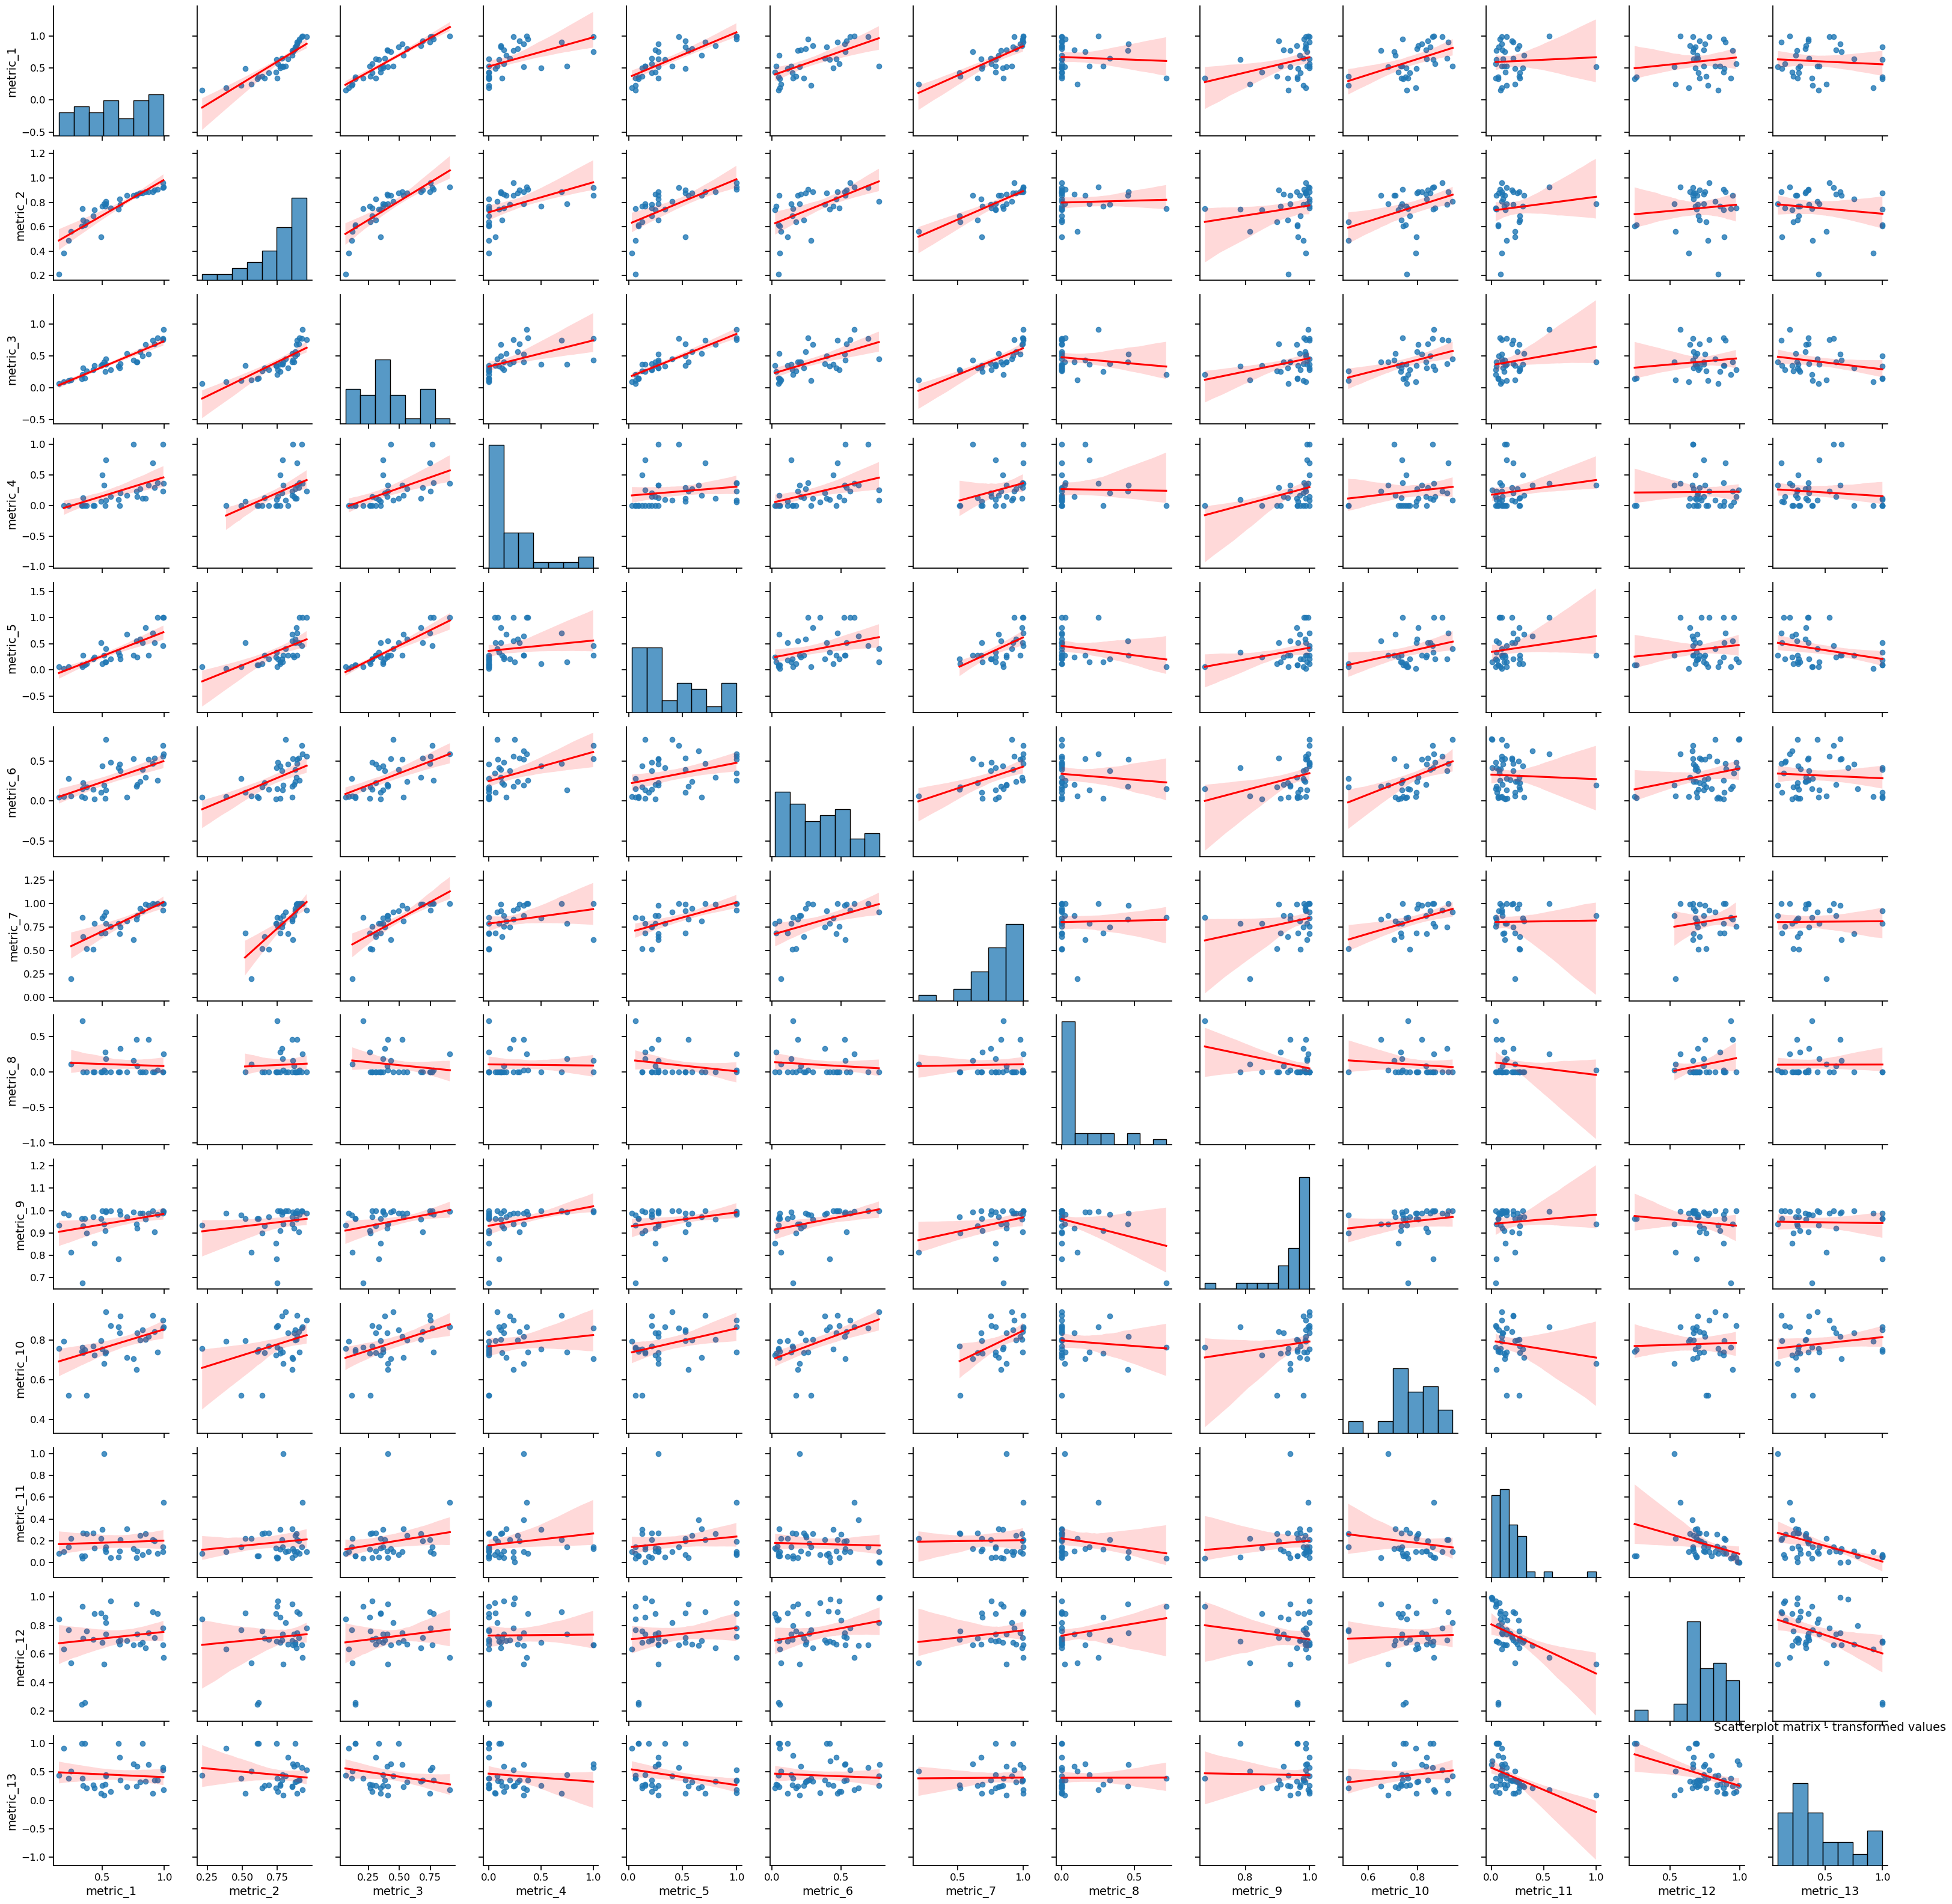

In [9]:
# Assuming final_geo_df, original_mask, and plots_path are defined
df_subset = final_geo_df[all_metrics_columns]

# Select relevant numerical columns for the scatterplot matrix
columns = df_subset.select_dtypes(include=['float64', 'int64']).columns

# Increase font size globally using Seaborn settings
sns.set_context("notebook", font_scale=1.5)  # Adjust `font_scale` as needed

# Create the scatterplot matrix with regression lines
g = sns.pairplot(df_subset[columns], kind="reg", plot_kws={'line_kws': {'color': 'red'}})

# Customize axis label fonts directly (optional, if you need more control)
for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=14)  # Increase x-axis label size
    ax.set_ylabel(ax.get_ylabel(), fontsize=14)  # Increase y-axis label size
    ax.tick_params(axis='both', which='major', labelsize=12)  # Increase tick size


plt.title('Scatterplot matrix - transformed values', fontsize=14)

# Save and display the plot
plt.savefig(f'{plots_path}/scatterplot_matrix_transformed_plain.png', dpi=300, bbox_inches='tight')
plt.show()

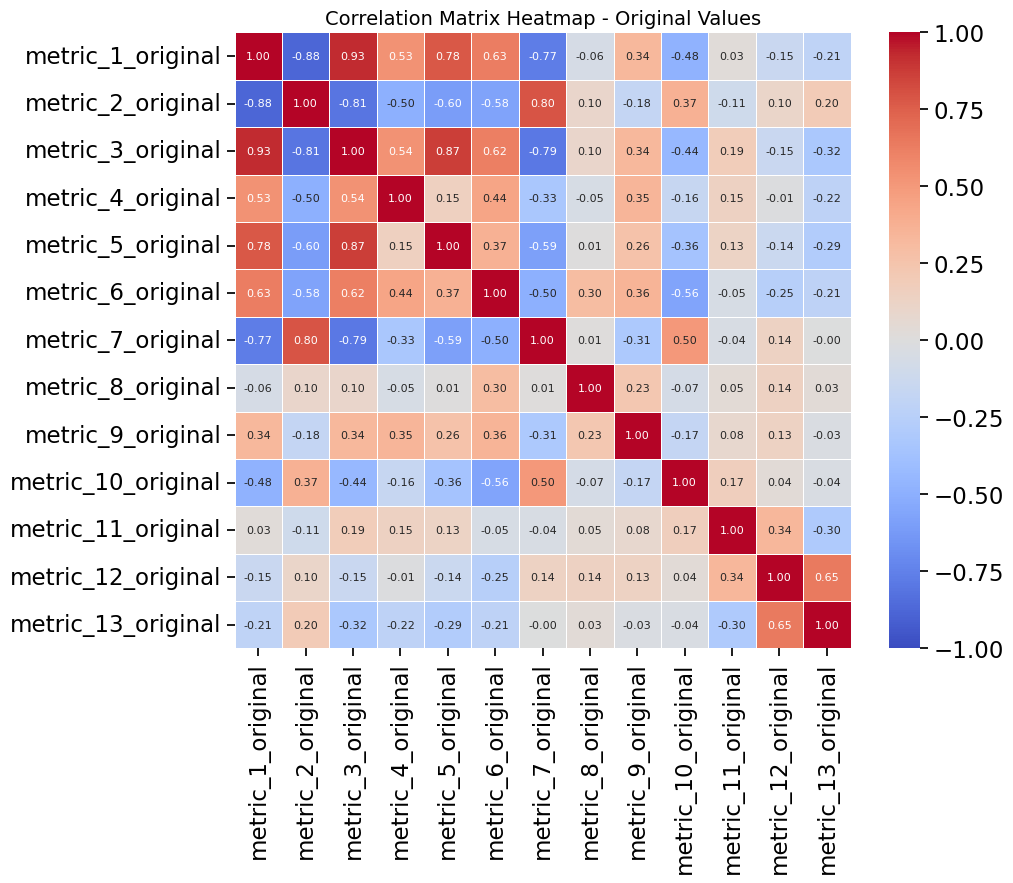

In [10]:
# Compute the correlation matrix
corr_matrix = final_geo_df[original_mask].corr()

# Plot the heatmap with smaller font size and 2 decimal places
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f",  # Format numbers to 2 decimal places
    cmap='coolwarm', 
    vmin=-1, vmax=1, 
    square=True, 
    linewidths=0.5,
    annot_kws={"size": 8}  # Adjust the font size of the annotations
)

# Add title and save the plot
plt.title('Correlation Matrix Heatmap - Original Values', fontsize=14)
plt.savefig(f'{plots_path}/correlation_matrix_original.png', dpi=300, bbox_inches='tight')
plt.show()

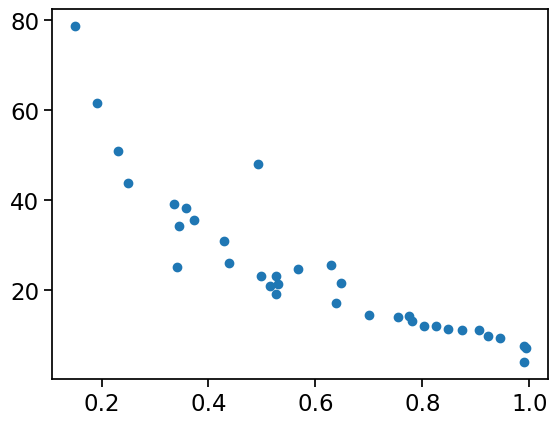

In [11]:
plt.scatter(final_geo_df.metric_1_original,final_geo_df.metric_2_original)


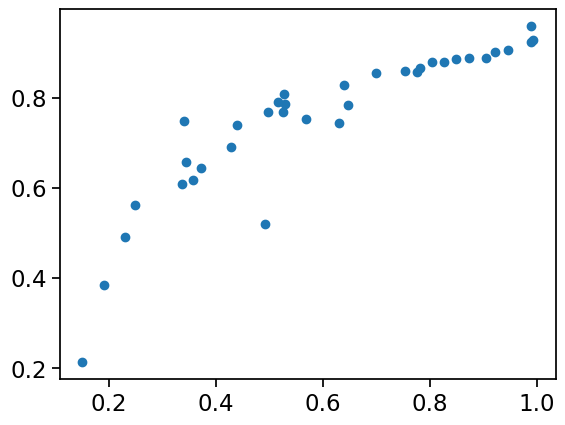

In [12]:
plt.scatter(final_geo_df.metric_1,final_geo_df.metric_2)


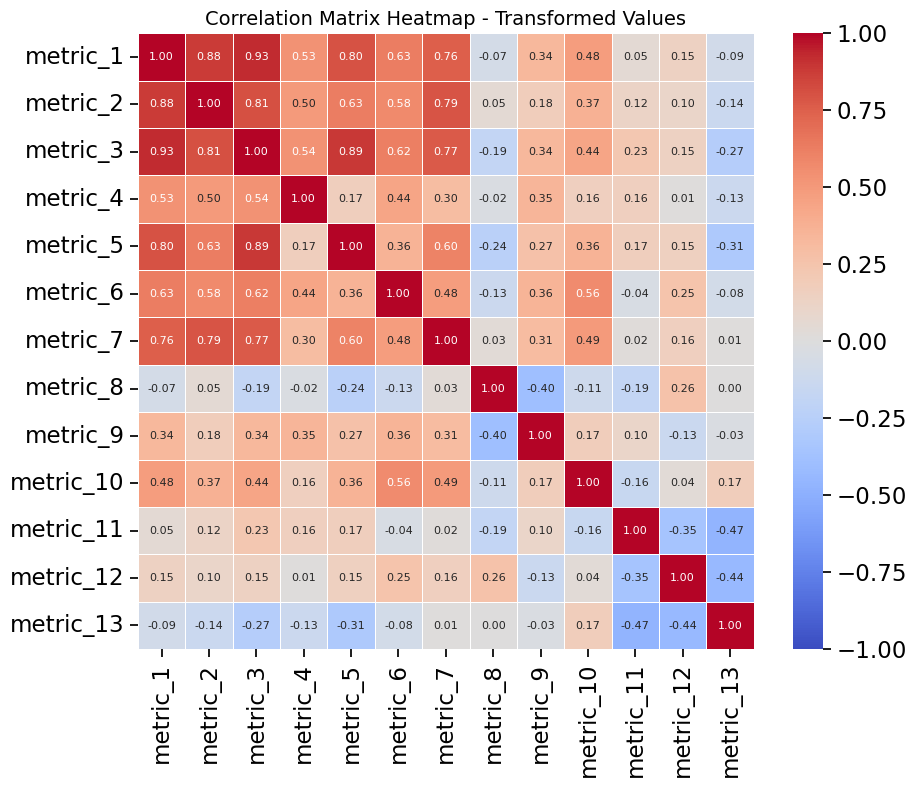

In [13]:
# Compute the correlation matrix
corr_matrix = final_geo_df[all_metrics_columns].corr()

# Plot the heatmap with smaller font size and 2 decimal places
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f",  # Format numbers to 2 decimal places
    cmap='coolwarm', 
    vmin=-1, vmax=1, 
    square=True, 
    linewidths=0.5,
    annot_kws={"size": 8}  # Adjust the font size of the annotations
)

# Add title and save the plot
plt.title('Correlation Matrix Heatmap - Transformed Values', fontsize=14)
plt.savefig(f'{plots_path}/correlation_matrix_transformed.png', dpi=300, bbox_inches='tight')
plt.show()


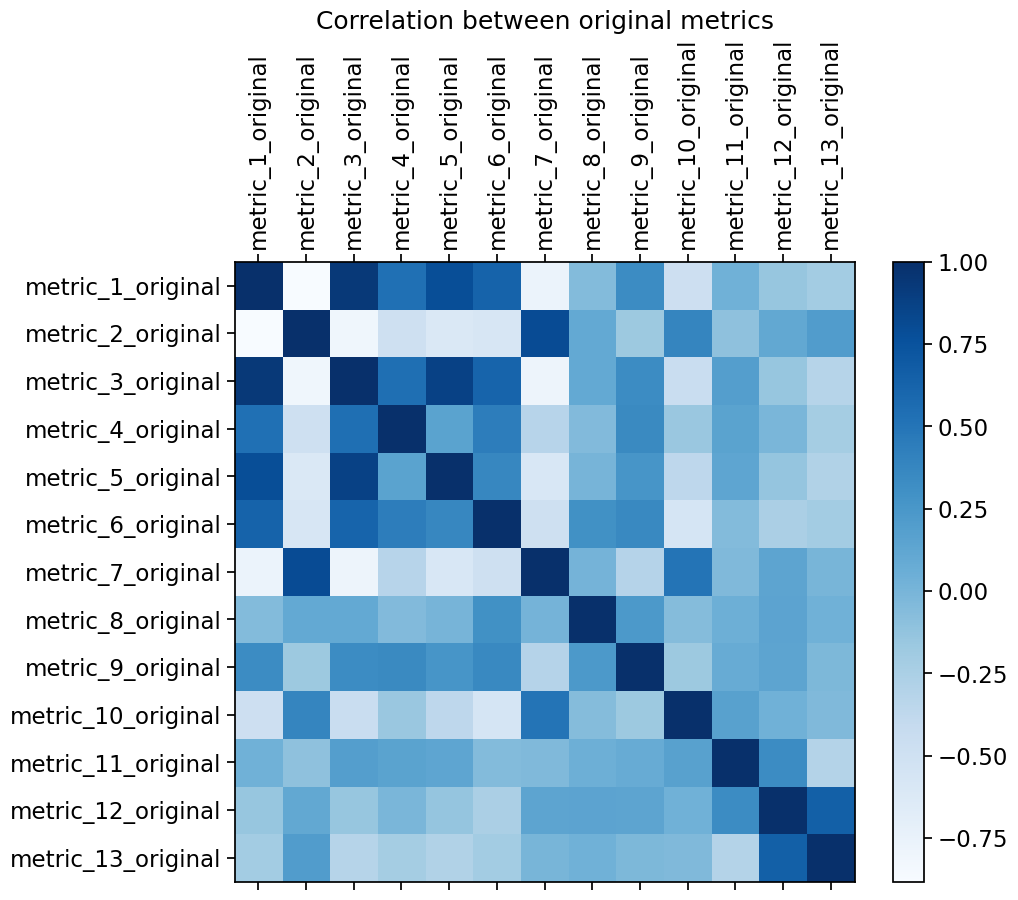

In [14]:
# Assuming BH_100 is your DataFrame, and all_original_metrics_columns contains the columns of interest

corr_matrix = final_geo_df.loc[:, original_mask].corr()

# Create the plot
plt.figure(figsize=(10, 8))

# Using a diverging colormap, such as `seismic`, `coolwarm`, or `PuBu_r`
# These will highlight 0 clearly while using one hue (for example, blue)
cax = plt.matshow(corr_matrix, cmap='Blues', fignum=1)  # Use any diverging colormap of your choice


# Add colorbar (legend)
plt.colorbar(cax)

# Add column and row names
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90);  # Rotate x-axis labels
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns);

plt.title('Correlation between original metrics')

# Display the plot
plt.show()


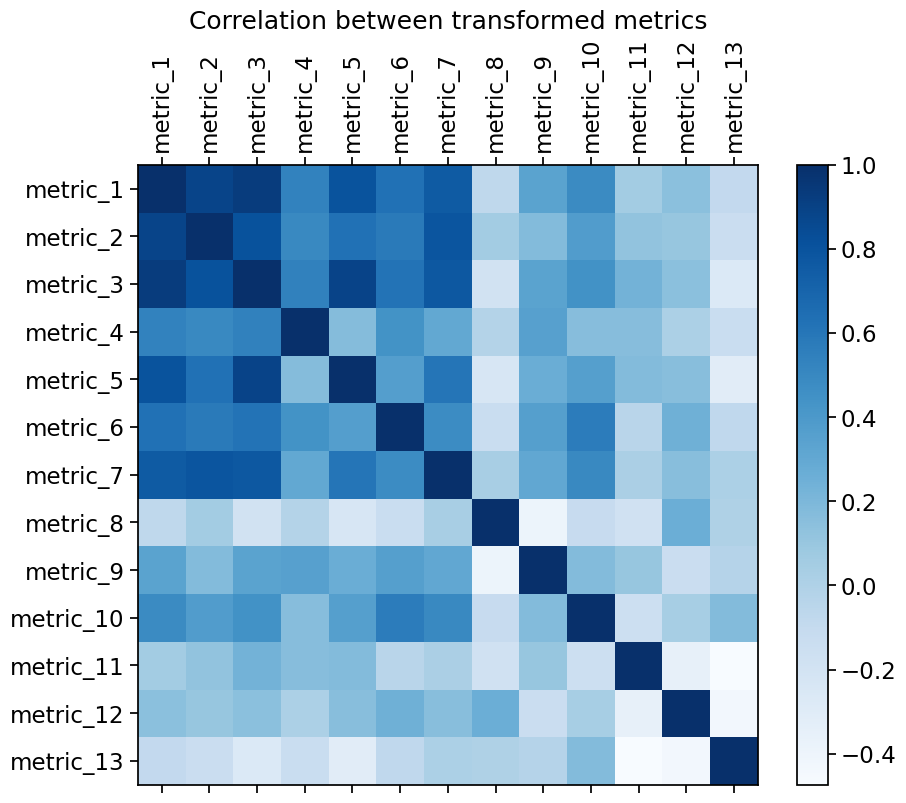

In [15]:
# Assuming BH_100 is your DataFrame, and all_original_metrics_columns contains the columns of interest
corr_matrix = final_geo_df.loc[:, all_metrics_columns].corr()


# Create the plot
plt.figure(figsize=(10, 8))

# Using a diverging colormap, such as `seismic`, `coolwarm`, or `PuBu_r`
# These will highlight 0 clearly while using one hue (for example, blue)
cax = plt.matshow(corr_matrix, cmap='Blues', fignum=1)  # Use any diverging colormap of your choice


# Add colorbar (legend)
plt.colorbar(cax)

# Add column and row names
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90);  # Rotate x-axis labels
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns);

plt.title('Correlation between transformed metrics')

# Display the plot
plt.show()


In [16]:
final_geo_df.loc[:, all_original_metrics_columns].corr()

metric_1  metric_2_original  metric_3_original  metric_4  \
metric_1            1.000000          -0.882392           0.928460  0.531933   
metric_2_original  -0.882392           1.000000          -0.809561 -0.498208   
metric_3_original   0.928460          -0.809561           1.000000  0.538126   
metric_4            0.531933          -0.498208           0.538126  1.000000   
metric_5_original   0.779709          -0.603862           0.872719  0.149061   
metric_6_original   0.630705          -0.577660           0.618023  0.440438   
metric_7_original  -0.768899           0.795834          -0.793427 -0.330411   
metric_8           -0.070831          -0.053450          -0.187085 -0.024426   
metric_9            0.335008          -0.176320           0.335367  0.350083   
metric_10_original -0.482013           0.374992          -0.443227 -0.160166   
metric_11_original  0.030304          -0.106131           0.186051  0.147613   
metric_12_original -0.146911           0.103325          -0.145447 -0.010392   
metric_13_original -0.208006           0.201950          -0.323343 -0.215255   

                    metric_5_original  metric_6_original  metric_7_original  \
metric_1                     0.779709           0.630705          -0.768899   
metric_2_original           -0.603862          -0.577660           0.795834   
metric_3_original            0.872719           0.618023          -0.793427   
metric_4                     0.149061           0.440438          -0.330411   
metric_5_original            1.000000           0.369089          -0.592213   
metric_6_original            0.369089           1.000000          -0.497411   
metric_7_original           -0.592213          -0.497411           1.000000   
metric_8                    -0.200181          -0.130626          -0.031966   
metric_9                     0.263969           0.358403          -0.314531   
metric_10_original          -0.363141          -0.562552           0.502557   
metric_11_original           0.127700          -0.052269          -0.039445   
metric_12_original          -0.137576          -0.250699           0.139104   
metric_13_original          -0.288913          -0.210971          -0.003774   

                    metric_8  metric_9  metric_10_original  \
metric_1           -0.070831  0.335008           -0.482013   
metric_2_original  -0.053450 -0.176320            0.374992   
metric_3_original  -0.187085  0.335367           -0.443227   
metric_4           -0.024426  0.350083           -0.160166   
metric_5_original  -0.200181  0.263969           -0.363141   
metric_6_original  -0.130626  0.358403           -0.562552   
metric_7_original  -0.031966 -0.314531            0.502557   
metric_8            1.000000 -0.397434            0.111607   
metric_9           -0.397434  1.000000           -0.172029   
metric_10_original  0.111607 -0.172029            1.000000   
metric_11_original -0.168215  0.078878            0.165824   
metric_12_original -0.263008  0.134397            0.036722   
metric_13_original -0.039238 -0.027578           -0.038139   

                    metric_11_original  metric_12_original  metric_13_original  
metric_1                      0.030304           -0.146911           -0.208006  
metric_2_original            -0.106131            0.103325            0.201950  
metric_3_original             0.186051           -0.145447           -0.323343  
metric_4                      0.147613           -0.010392           -0.215255  
metric_5_original             0.127700           -0.137576           -0.288913  
metric_6_original            -0.052269           -0.250699           -0.210971  
metric_7_original            -0.039445            0.139104           -0.003774  
metric_8                     -0.168215           -0.263008           -0.039238  
metric_9                      0.078878            0.134397           -0.027578  
metric_10_original            0.165824            0.036722           -0.038139  
metric_11_original            1.

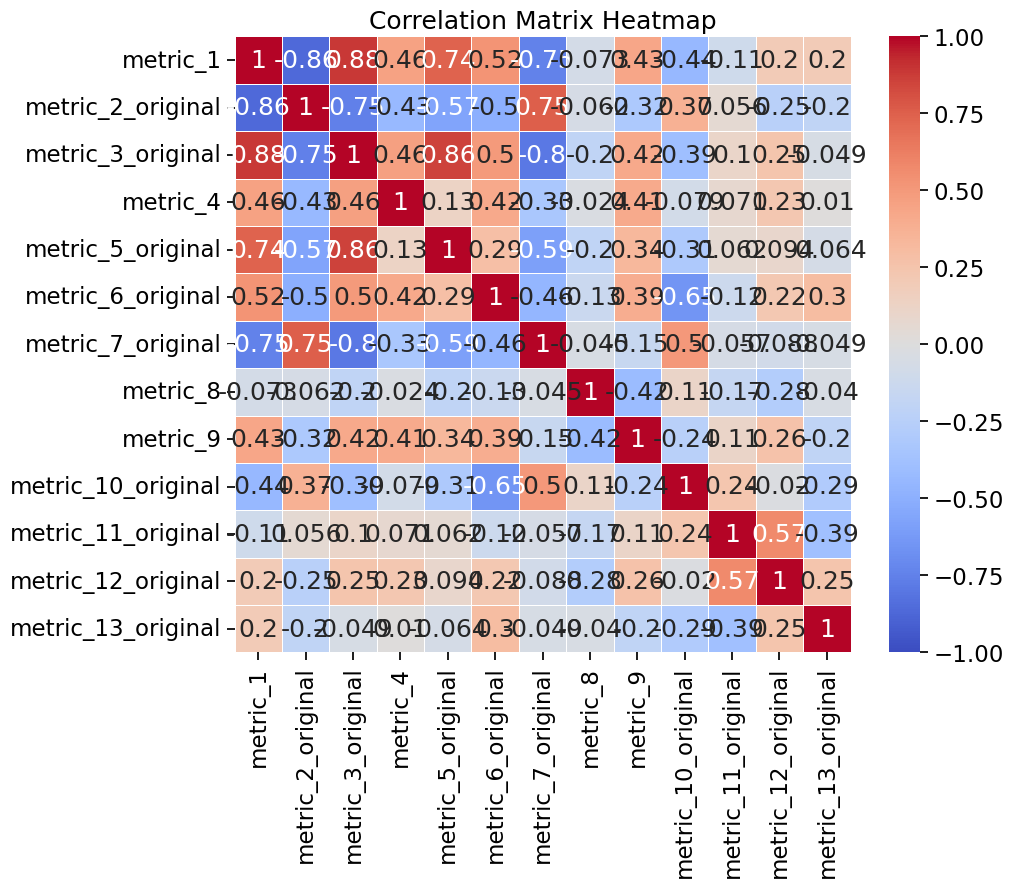

In [17]:
features = all_original_metrics_columns
x = final_geo_df.dropna(how='any').loc[:, features].values
#y = BH_100.loc[:,['target']].values
x = StandardScaler().fit_transform(x)

standardized_df = pd.DataFrame(x, columns=features)

# Compute the correlation matrix
corr_matrix = standardized_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [18]:

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, final_geo_df['irregularity_index']], axis = 1)

KeyError: 'irregularity_index'

In [ ]:
principalDf

principal component 1  principal component 2
0                2.205177               0.403646
1               -2.589914              -0.937506
2                0.950331              -1.708997
3                0.812432              -1.505833
4               -1.339598               0.328535
5                3.220859              -0.438030
6               -0.175266              -1.794254
7                3.974346              -0.917970
8               -3.487780               3.475951
9               -0.371302               1.969780
10               1.207201              -0.224091
11               3.699141               0.234414
12              -0.472957              -0.320836
13              -3.239057              -0.861604
14               1.210852               1.239029
15               1.474113               1.086743
16              -0.473925              -1.487878
17               4.210685               1.232203
18              -0.133926               0.453317
19              -3.442281              -1.096748
20              -1.250378               0.007135
21               1.203992               0.168450
22              -0.719002              -1.699715
23               2.772517               0.870744
24              -2.773036               1.005884
25              -0.108992               0.610589
26              -2.970945              -0.595787
27              -2.512294               0.601973
28              -0.880991              -0.099146

In [ ]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=features)

# Display the loadings
print(loadings)

                         PC1       PC2
metric_1            0.412790  0.142564
metric_2_original  -0.379991 -0.221555
metric_3_original   0.412145  0.127142
metric_4            0.246504 -0.197938
metric_5_original   0.329780  0.194156
metric_6_original   0.309520 -0.300383
metric_7_original  -0.357120 -0.316373
metric_8           -0.076395  0.568558
metric_9            0.231586 -0.484181
metric_10_original -0.251044  0.299226


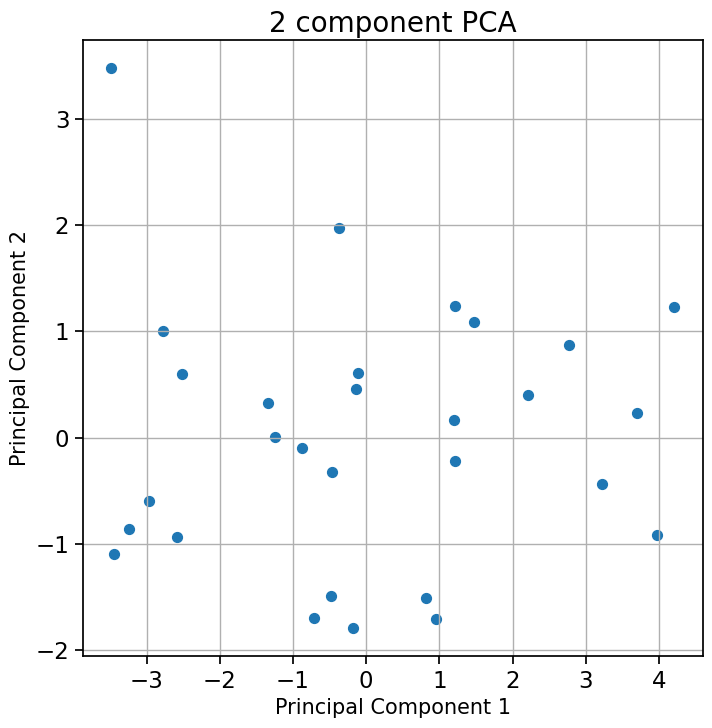

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

ax.scatter(finalDf.loc[:, 'principal component 1'], 
           finalDf.loc[:, 'principal component 2'],
           s = 50)

ax.grid()

In [ ]:
pca.explained_variance_ratio_

array([0.50889825, 0.14189205])

In [ ]:
final_geo_df[features].describe()

metric_1  metric_2_original  metric_3_original   metric_4  \
count  35.000000          35.000000          35.000000  38.000000   
mean    0.603544          24.669287          16.287393   0.220586   
std     0.251495          16.672466           8.763144   0.263833   
min     0.150289           4.123467           2.553153   0.000000   
25%     0.400484          12.190211          10.921876   0.000000   
50%     0.568182          21.383327          14.678110   0.133929   
75%     0.814998          32.705854          21.128070   0.323529   
max     0.993677          78.720982          36.347777   1.000000   

       metric_5_original  metric_6_original  metric_7_original   metric_8  \
count          39.000000          48.000000          30.000000  30.000000   
mean          136.666441           0.322298          62.137279   0.103382   
std           114.967479           0.221748          31.946814   0.181593   
min            10.000041           0.022104          21.382172   0.000000   
25%            50.000093           0.143538          39.594670   0.000000   
50%            89.999514           0.274302          57.276990   0.000000   
75%           184.999221           0.489028          80.158761   0.149642   
max           410.002117           0.779781         166.015551   0.719925   

        metric_9  metric_10_original  
count  35.000000           33.000000  
mean    0.947342           11.308880  
std     0.071221            8.769019  
min     0.673762            0.944582  
25%     0.933245            2.416831  
50%     0.971931           10.794730  
75%     0.990205           18.131935  
max     1.000000           27.233171

In [ ]:
len(final_geo_df[features].dropna(how='any'))



29

In [ ]:
kmeans = KMeans(n_clusters=3)  # You can experiment with the number of clusters
kmeans.fit(x)  # 'x' being the scaled version of your metrics
labels = kmeans.labels_

In [ ]:
labels

array([2, 1, 0, 2, 1, 0, 1, 0, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2,
       1, 2, 1, 2, 1, 1, 1], dtype=int32)

**Factor analysis**

In [ ]:
# Factor analysis
fa = FactorAnalysis(n_components=2)
components = fa.fit_transform(x)

In [ ]:

rf = RandomForestRegressor()
rf.fit(x, labels)
feature_importance = rf.feature_importances_
